## Datos de Oleaje

In [ ]:
## Probando seleccionar datos
#### Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
# https://docs.xarray.dev/en/stable/gallery.html
import cf_xarray
import folium
import seawater as sw
from palettable import cmocean
import datetime
import json
from erddapy import ERDDAP

#### Cargar fichero

In [2]:
url_oleaje_01 = "https://opendap.jpl.nasa.gov/opendap/SeaSurfaceTopography/jason3/preview/L2/GPS-OGDR/c103/JA3_GPSOPR_2PdS103_001_20181124_205057_20181124_224542.nc?time[0:1:6670],lat[0:1:6670],lon[0:1:6670],swh_ku[0:1:6670]"

In [3]:
ds = xr.open_dataset(url_oleaje_01)
ds

<xarray.Dataset>
Dimensions:  (time: 6671)
Coordinates:
  * time     (time) datetime64[ns] 2018-11-24T20:50:57.478607232 ... 2018-11-...
    lat      (time) float64 ...
    lon      (time) float64 ...
Data variables:
    swh_ku   (time) float32 ...
Attributes: (12/36)
    Conventions:                      CF-1.1
    title:                            GPSOGDR - Reduced dataset
    institution:                      NOAA(OGDR) JPL(GPSOGDR)
    source:                           radar altimeter
    history:                          2018-11-25 02:22:06 : Append gps_alt an...
    contact:                          JPL podaac@podaac.jpl.nasa.gov
    ...                               ...
    xref_orf_data:                    JA3_ORF_AXXCNE20181124_082600_20160212_...
    xref_meteorological_files:        SMM_APP_AXVCNE20181123_181128_20181124_...
    xref_utc_tai_data:                SMM_TUC_AXVCNE20161207_152427_19900101_...
    xref_radiometer_calibration:      AJ3_AL1_AXVJPL20070809_053513_20070809_...
    ellipsoid_axis:                   6378136.3
    ellipsoid_flattening:             0.0033528131778969

In [4]:
# Obtener una lista de las variables en el conjunto de dato
variables = ds.variables

In [5]:
# Seleccionar un subconjunto de variables como un nuevo conjunto de datos
new_ds = ds[["time", "swh_ku"]]
print(new_ds)

<xarray.Dataset>
Dimensions:  (time: 6671)
Coordinates:
  * time     (time) datetime64[ns] 2018-11-24T20:50:57.478607232 ... 2018-11-...
    lat      (time) float64 63.47 63.49 63.51 63.52 ... 65.7 65.71 65.72 65.72
    lon      (time) float64 156.1 156.2 156.3 156.4 ... 143.1 143.3 143.4 143.5
Data variables:
    swh_ku   (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes: (12/36)
    Conventions:                      CF-1.1
    title:                            GPSOGDR - Reduced dataset
    institution:                      NOAA(OGDR) JPL(GPSOGDR)
    source:                           radar altimeter
    history:                          2018-11-25 02:22:06 : Append gps_alt an...
    contact:                          JPL podaac@podaac.jpl.nasa.gov
    ...                               ...
    xref_orf_data:                    JA3_ORF_AXXCNE20181124_082600_20160212_...
    xref_meteorological_files:        SMM_APP_AXVCNE20181123_181128_20181124_...
    xref_

#### Crear grafico

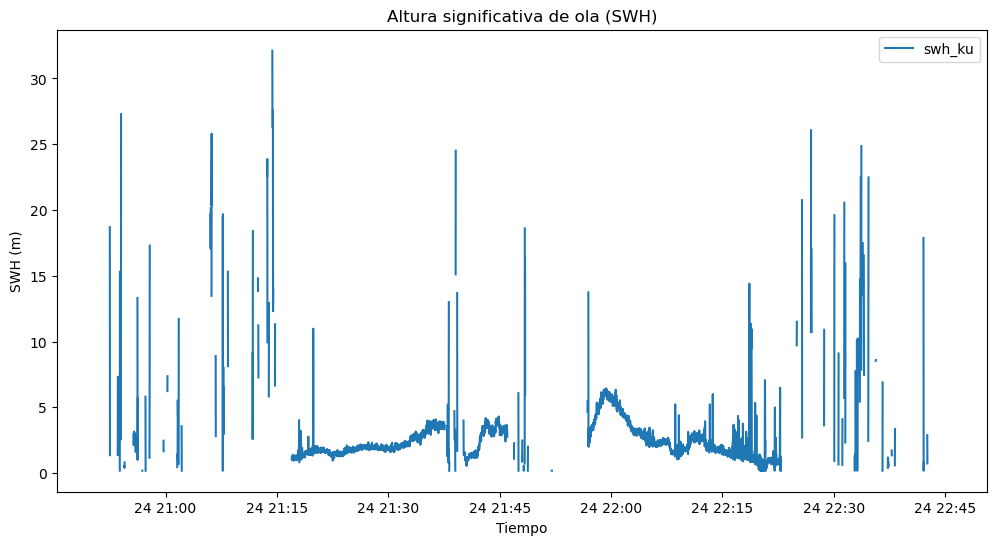

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
# Graficar los datos de swh_ku contra el tiempo
ax.plot(new_ds['time'], new_ds['swh_ku'], label='swh_ku')

# Agregar etiquetas de eje y título
ax.set_ylabel('SWH (m)')
ax.set_xlabel('Tiempo')
ax.set_title('Altura significativa de ola (SWH)')
# Agregar leyenda
ax.legend()

plt.show()

In [7]:
new_ds['time']
new_ds['swh_ku']

<xarray.DataArray 'swh_ku' (time: 6671)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-11-24T20:50:57.478607232 ... 2018-11-...
    lat      (time) float64 63.47 63.49 63.51 63.52 ... 65.7 65.71 65.72 65.72
    lon      (time) float64 156.1 156.2 156.3 156.4 ... 143.1 143.3 143.4 143.5
Attributes:
    long_name:      Ku band corrected significant waveheight
    standard_name:  sea_surface_wave_significant_height
    units:          m
    comment:        All instrumental corrections included, i.e. modeled instr...

In [12]:
x = new_ds['swh_ku']

In [13]:
x

<xarray.DataArray 'swh_ku' (time: 6671)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-11-24T20:50:57.478607232 ... 2018-11-...
    lat      (time) float64 63.47 63.49 63.51 63.52 ... 65.7 65.71 65.72 65.72
    lon      (time) float64 156.1 156.2 156.3 156.4 ... 143.1 143.3 143.4 143.5
Attributes:
    long_name:      Ku band corrected significant waveheight
    standard_name:  sea_surface_wave_significant_height
    units:          m
    comment:        All instrumental corrections included, i.e. modeled instr...

## Análisis espectral

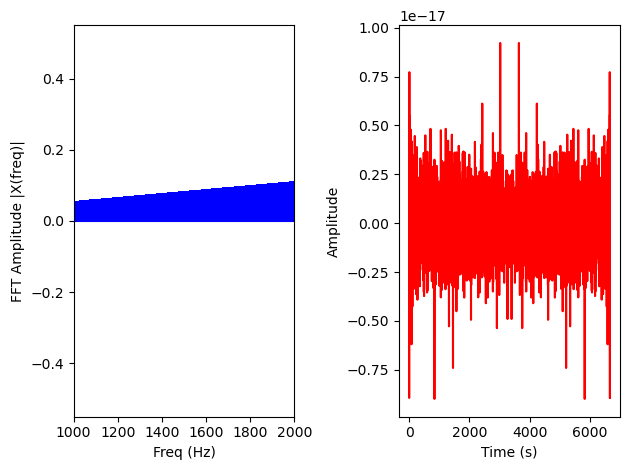

In [123]:
import numpy
import numpy.fft

from matplotlib.dates import YearLocator, DateFormatter, date2num

x = new_ds['swh_ku']
sr = date2num(new_ds['time'][:].squeeze())

N = len(X)
# n = np.arange(N)
n = numpy.arange(N)
T = N/sr
# T = N

X = np.fft.fftfreq(N, d=1)

freq = n/T 

plt.figure()
plt.subplot(121)

plt.stem(freq, X, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(1000, 2000)
plt.tight_layout()

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [124]:
X

array([ 0.        ,  0.0001499 ,  0.00029981, ..., -0.00044971,
       -0.00029981, -0.0001499 ])